**Task 1: Implement a Decision Tree Classifier for your classification problem.**

For this homework I decided to use a new dataset. The dataset I used in HW1 had bad data quality because a lot of the data was missing or unknown and the features didn't provide useful information. I am instead using a data set that contains 12,000+ records detailing various factors related to anxiety attacks, including demographics, lifestyle habits, stress levels, and physiological responses.

This is the [link](https://www.kaggle.com/datasets/ashaychoudhary/anxiety-attack-factors-symptoms-and-severity?resource=download) to the data.

First must prepare data:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the dataset
data = pd.read_csv("anxiety_attack_dataset.csv")


# Drop irrelevant columns
data_cleaned = data.drop(columns=['ID'])

# Encode categorical variables
categorical_columns = ['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety',
                       'Dizziness', 'Medication', 'Recent Major Life Event']
encoder = LabelEncoder()
for col in categorical_columns:
    data_cleaned[col] = encoder.fit_transform(data_cleaned[col])

# Binarize the target variable
data_cleaned['Severity_Binary'] = (data_cleaned['Severity of Anxiety Attack (1-10)'] > 5).astype(int)

# Check for missing values (no missing values observed earlier)
# Normalize numerical features
scaler = MinMaxScaler()
numerical_columns = ['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
                     'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
                     'Stress Level (1-10)', 'Heart Rate (bpm during attack)',
                     'Breathing Rate (breaths/min)', 'Sweating Level (1-5)',
                     'Therapy Sessions (per month)', 'Diet Quality (1-10)']

data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Drop the original severity column, retaining only the binary target
data_cleaned = data_cleaned.drop(columns=['Severity of Anxiety Attack (1-10)'])

# Display the cleaned dataset structure
data_cleaned.head(), data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                12000 non-null  float64
 1   Gender                             12000 non-null  int64  
 2   Occupation                         12000 non-null  int64  
 3   Sleep Hours                        12000 non-null  float64
 4   Physical Activity (hrs/week)       12000 non-null  float64
 5   Caffeine Intake (mg/day)           12000 non-null  float64
 6   Alcohol Consumption (drinks/week)  12000 non-null  float64
 7   Smoking                            12000 non-null  int64  
 8   Family History of Anxiety          12000 non-null  int64  
 9   Stress Level (1-10)                12000 non-null  float64
 10  Heart Rate (bpm during attack)     12000 non-null  float64
 11  Breathing Rate (breaths/min)       12000 non-null  flo

(        Age  Gender  Occupation  Sleep Hours  Physical Activity (hrs/week)  \
 0  0.826087       0           2     0.942857                          0.83   
 1  0.608696       1           4     0.485714                          0.73   
 2  0.304348       0           0     0.557143                          0.10   
 3  0.913043       1           0     0.885714                          0.37   
 4  0.152174       1           3     0.885714                          0.25   
 
    Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  Smoking  \
 0                  0.350701                           0.315789        0   
 1                  0.194389                           0.315789        0   
 2                  0.935872                           0.736842        0   
 3                  0.943888                           0.842105        0   
 4                  0.729459                           0.105263        0   
 
    Family History of Anxiety  Stress Level (1-10)  \
 0          

Implemented decision tree classifier and using 3 different max_depth values (2, 5, None)

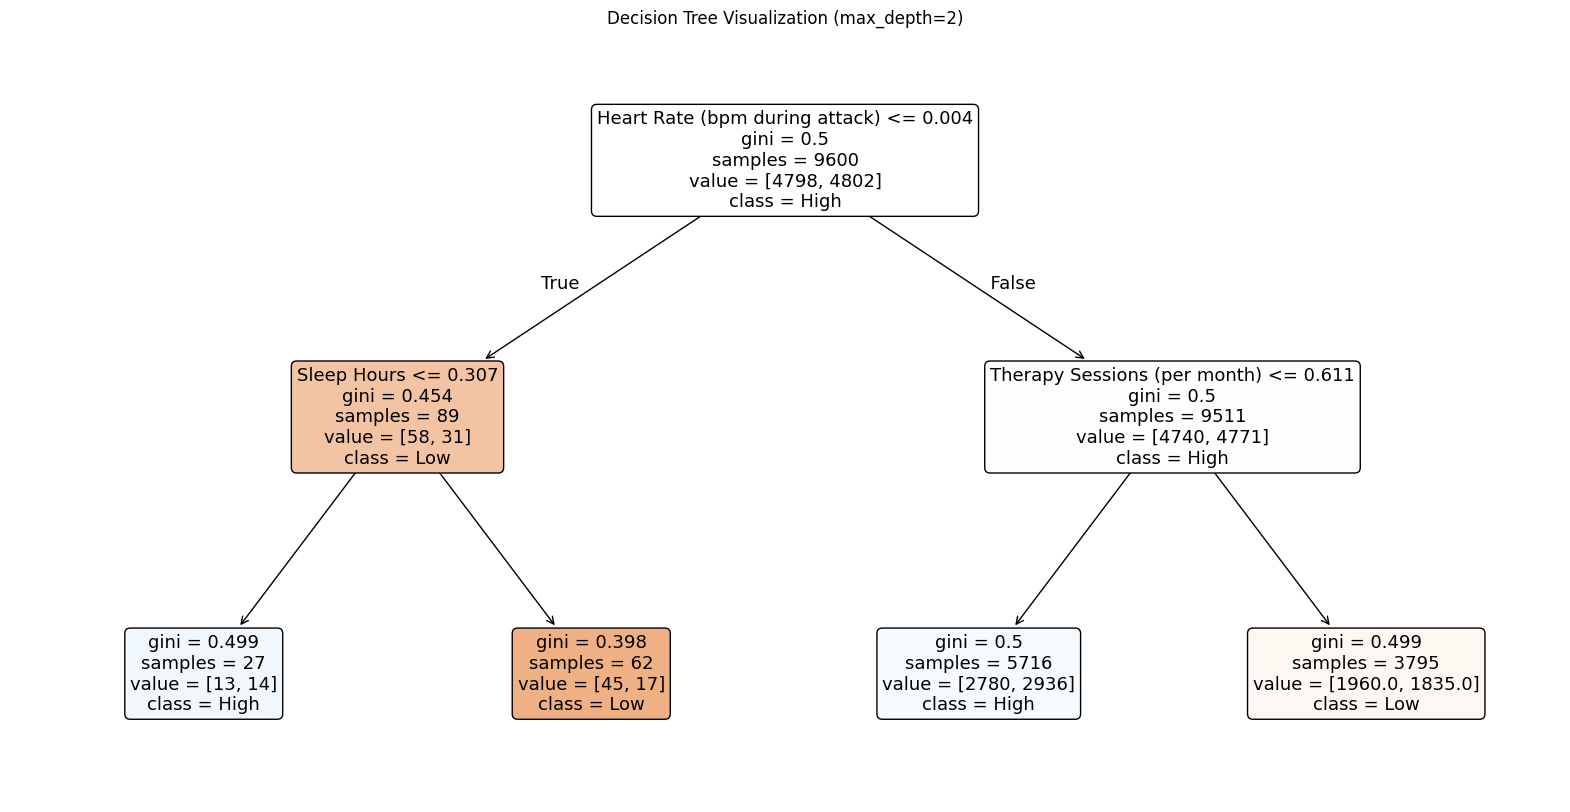

In [ ]:
# Separate features and target variable
X = data_cleaned.iloc[:, :-1]  # All columns except the last one
y = data_cleaned.iloc[:, -1]   # The last column (target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Split the data into features and target
X = data_cleaned.drop(columns=['Severity_Binary'])
y = data_cleaned['Severity_Binary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plot_tree(clf, feature_names=X.columns, class_names=["Low", "High"], filled=True, rounded=True)

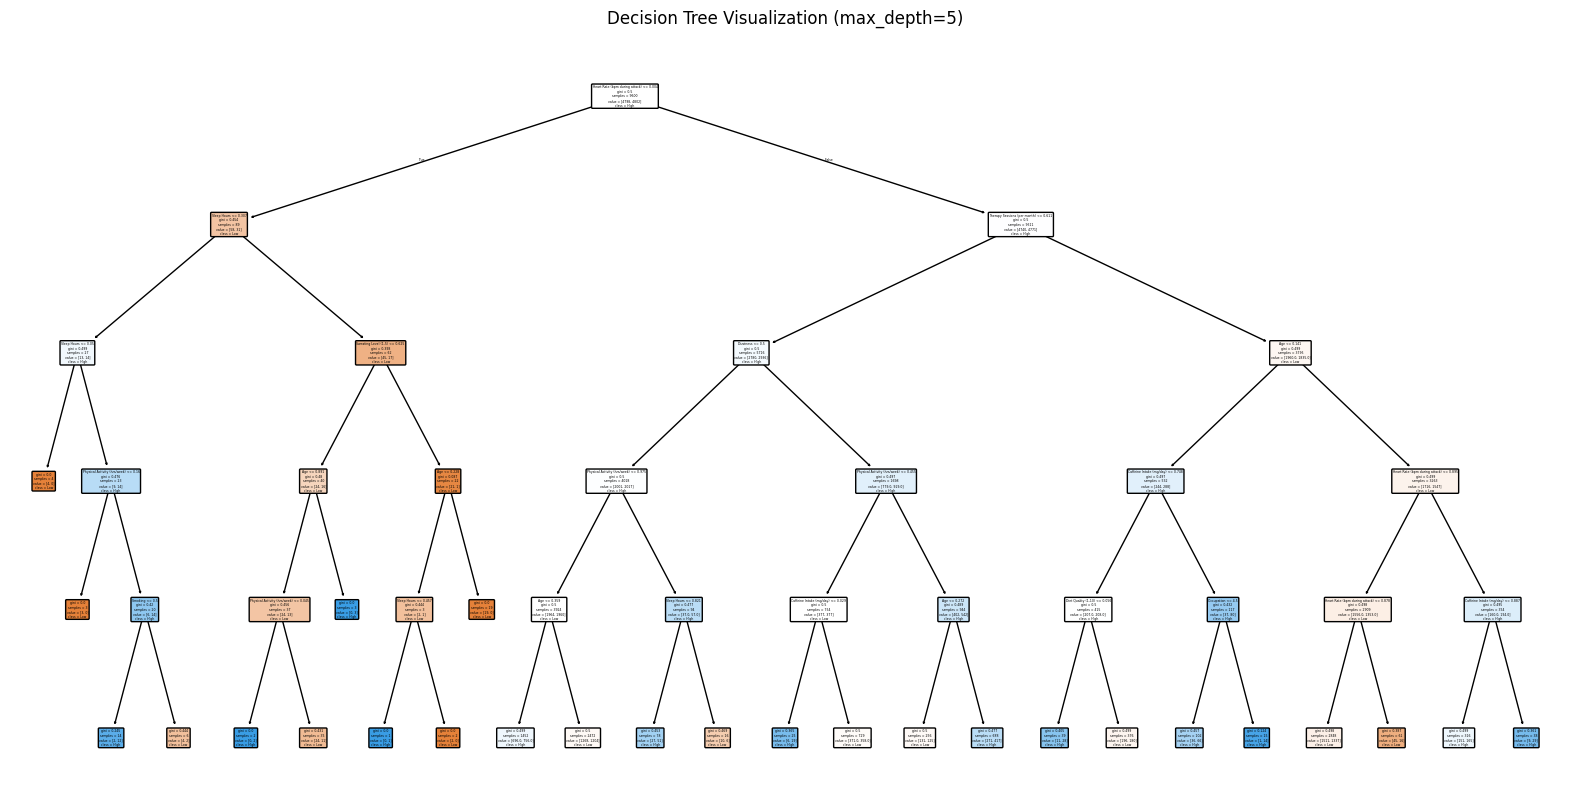

In [ ]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=35)
clf.fit(X_train, y_train)

# Visualize the decision tree

plot_tree(clf, feature_names=X.columns, class_names=["Low", "High"], filled=True, rounded=True)


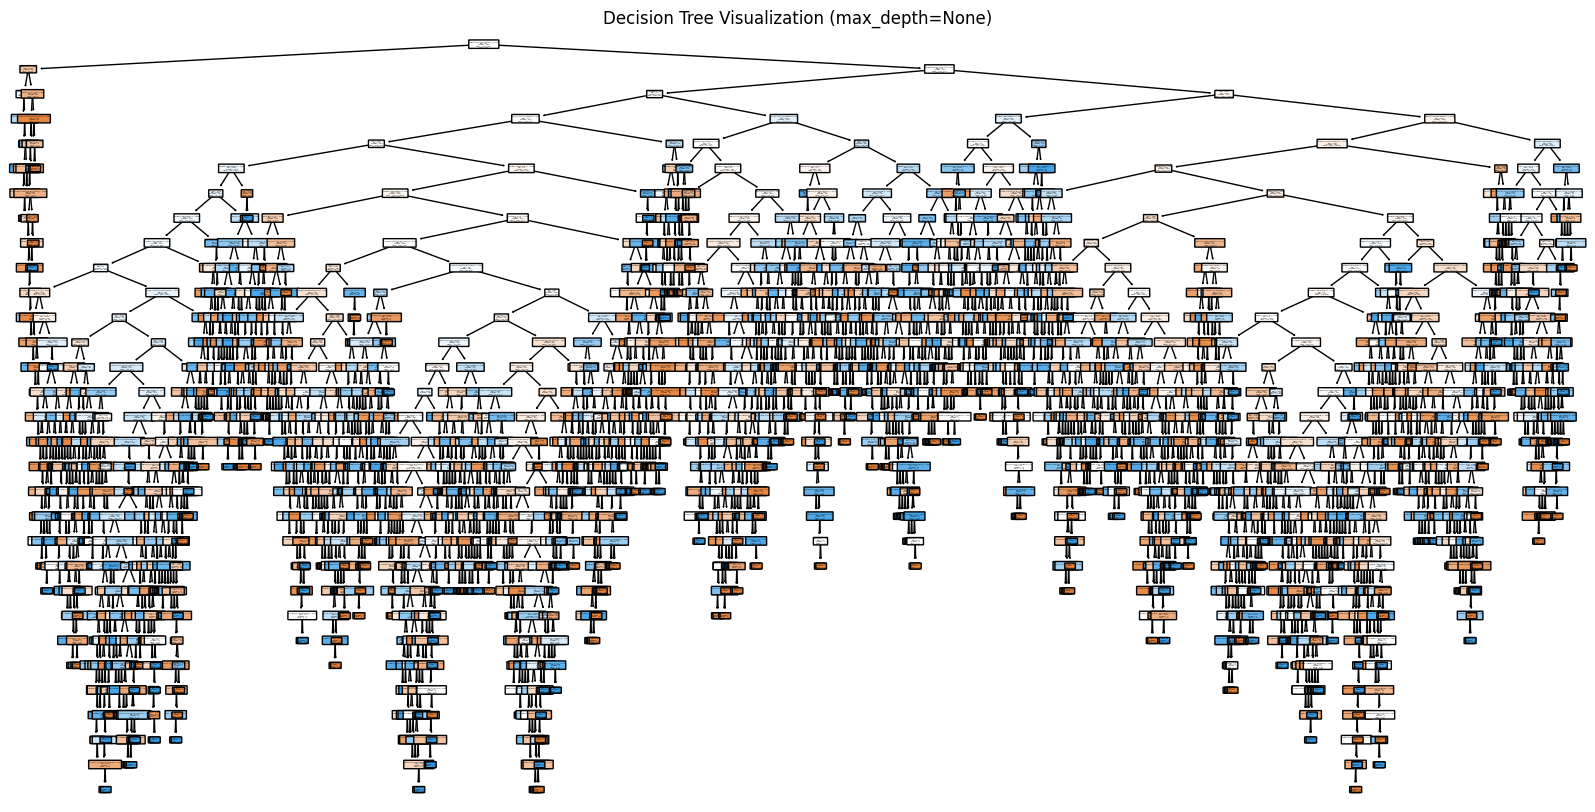

In [ ]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=None, random_state=35)
clf.fit(X_train, y_train)

# Visualize the decision tree
plot_tree(clf, feature_names=X.columns, class_names=["Low", "High"], filled=True, rounded=True)


There are 3 visualizations all varying in max_depth:

1.   max_depth = 2 is a shallow tree with limited splits and provides a high-level decision boundary. Although it is simple and interpretable, it may underfit the data and miss finer patterns.
2.   max_depth = 5 is a moderately deep tree that captures more patterns in the data. This does a good job in balancing simplicity and complexity capturing more patterns while maintaining generalization.
3. max_depth = None is a fully grown tree that may overfit the training data thus leading to high complexity. However it fits the training data perfectly thus capturing every pattern.



Sensitivity Analysis is used to show how changes in the inputs of a model affects the output. It will identify which input variables have the most significant effect on the output. In addition it helps in refining models by highlighting areas of sensitivity. Sensitivity Analysis has many applications, the most common being finance. For finance it wil assess the impacts of intrest and exchange rates, it can also be used to make prediction about share prices. Overall by identifying valuable inpuuts and their impacts, sensitivity analysis can help in resource allocation, risk management and decision-making.

This [link](https://www.investopedia.com/terms/s/sensitivityanalysis.asp) and this [article](https://www.ncbi.nlm.nih.gov/books/NBK209895/) were used in doing research.



Perform sensitivity analysis

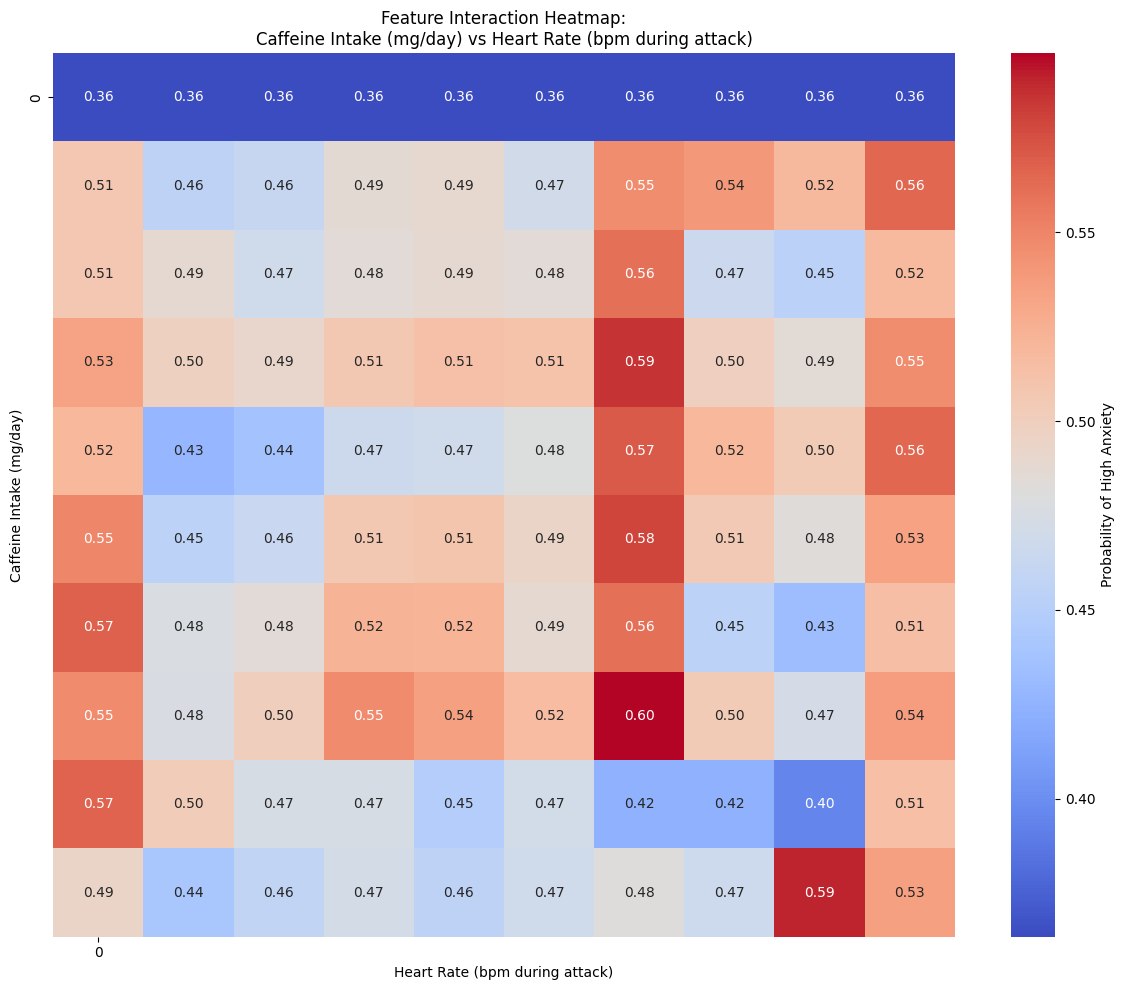

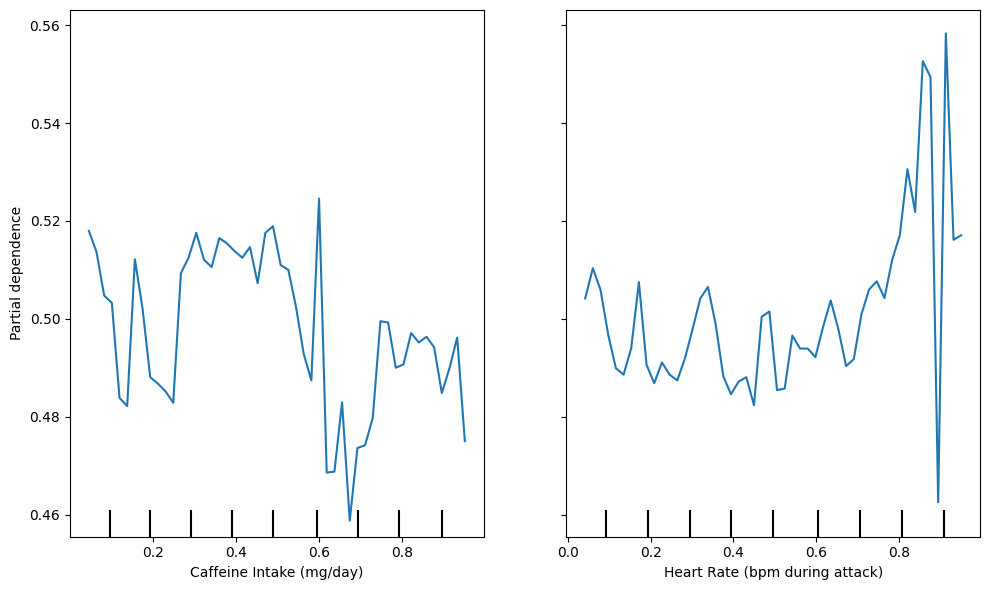


Model Performance Metrics:
Accuracy on test set: 0.511


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score

def analyze_feature_sensitivity(model, X, n_features=2):

    features = ['Caffeine Intake (mg/day)','Heart Rate (bpm during attack)']

    # Create grid of values for each feature
    grid_points = 10
    feature_grids = []
    for feature in features:
        feature_min = X[feature].min()
        feature_max = X[feature].max()
        grid = np.linspace(feature_min, feature_max, grid_points)
        feature_grids.append(grid)

    # Create meshgrid for all combinations
    grid_combinations = np.meshgrid(*feature_grids)

    # Calculate partial dependence values
    pdp_values = np.zeros((grid_points, grid_points))
    for i in range(grid_points):
        for j in range(grid_points):
            X_temp = X.copy()
            X_temp[features[0]] = grid_combinations[0][i, j]
            X_temp[features[1]] = grid_combinations[1][i, j]
            pdp_values[i, j] = model.predict_proba(X_temp)[:, 1].mean()

    # Create heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(pdp_values, xticklabels=10, yticklabels=10, cmap='coolwarm', annot=True, fmt='.2f',cbar_kws={'label': 'Probability of High Anxiety'})

    plt.show()

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    display = PartialDependenceDisplay.from_estimator( model, X, features=features, feature_names=X.columns.tolist(), n_jobs=3, grid_resolution=50, ax=ax)

    plt.show()

    return features

# Perform sensitivity analysis
features = analyze_feature_sensitivity(clf, X)

# Print overall model performance metrics
y_pred = clf.predict(X_test)
print("\nModel Performance Metrics:")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.3f}")


**Task 2 Bagging and Boosting**
For this task I chose to implement the Random Forest (Bagging) and AdaBoost (Boosting) Algorithms.

I used this [link](https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/) to learn more about stratifief k-fold cross-validation.


In [2]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score


# Define models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
ab_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# Define StratifiedKFold configuration
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Helper function to evaluate metrics
def evaluate_model(clf, X, y, skf):
    accuracies, precisions, f1_scores = [], [], []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Calculate metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='binary'))
        f1_scores.append(f1_score(y_test, y_pred, average='binary'))

    return {
        'Accuracy': (sum(accuracies) / len(accuracies)),
        'Precision': (sum(precisions) / len(precisions)),
        'F1-Score': (sum(f1_scores) / len(f1_scores)),
    }
print("Number of folds: 5\n")
# Evaluate Random Forest
rf_metrics = evaluate_model(rf_clf, X, y, skf)
print("Random Forest Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.4f}")

# Evaluate AdaBoost
ab_metrics = evaluate_model(ab_clf, X, y, skf)
print("\nAdaBoost Metrics:")
for metric, value in ab_metrics.items():
    print(f"{metric}: {value:.4f}")


Number of folds: 5

Random Forest Metrics:
Accuracy: 0.5050
Precision: 0.5062
F1-Score: 0.4924

AdaBoost Metrics:
Accuracy: 0.5018
Precision: 0.5031
F1-Score: 0.5150


In [3]:
num_folds = 15
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)


print("Number of folds: 15\n")
# Evaluate Random Forest
rf_metrics = evaluate_model(rf_clf, X, y, skf)
print("Random Forest Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.4f}")

# Evaluate AdaBoost
ab_metrics = evaluate_model(ab_clf, X, y, skf)
print("\nAdaBoost Metrics:")
for metric, value in ab_metrics.items():
    print(f"{metric}: {value:.4f}")


Number of folds: 15

Random Forest Metrics:
Accuracy: 0.4993
Precision: 0.5007
F1-Score: 0.4838

AdaBoost Metrics:
Accuracy: 0.5047
Precision: 0.5054
F1-Score: 0.5264


In [4]:
num_folds = 30
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

print("Number of folds: 30\n")
# Evaluate Random Forest
rf_metrics = evaluate_model(rf_clf, X, y, skf)
print("Random Forest Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.4f}")

# Evaluate AdaBoost
ab_metrics = evaluate_model(ab_clf, X, y, skf)
print("\nAdaBoost Metrics:")
for metric, value in ab_metrics.items():
    print(f"{metric}: {value:.4f}")


Number of folds: 30

Random Forest Metrics:
Accuracy: 0.4972
Precision: 0.4982
F1-Score: 0.4846

AdaBoost Metrics:
Accuracy: 0.4999
Precision: 0.5010
F1-Score: 0.5137


Analysis of the Metrics:

1. Random Forest
  - Accuracy: Stayed close to around 50% across all folds (5, 15, 30)
  - Precisions: Was also consistently aroung 50%
  - F1-score was slightly lower than precision, as it balances both precision and recall. THis indicated that the model struggles with false negatives

  2. AdaBoost
  - Accuracy: Was slightly better than random forest but still around 50%, thus showing that it has a marginally better classification ability
  - Precision: Slightly higher than Random Forst but still near 50%
  - Higher than both precision and accuracy, thus showing that AdaBoost is better at balancing precision and recall compared to Random Forest

  Overall AdaBoost consistently slightly outpreforms Random Forest in F1 Score, suggesting the possibility of better handling of postive cases. However, there is not significant improvement with these models or with increased number of folds.

**Task 3: Compare effectiveness of the three models**

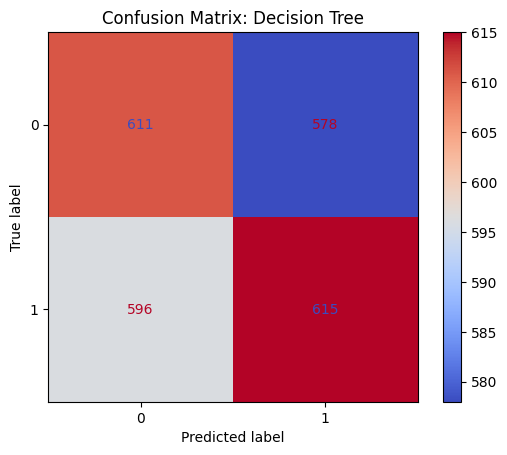

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions for the Decision Tree model
y_pred_tree = clf.predict(X_test)

# Compute confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=clf.classes_)
disp_tree.plot(cmap='coolwarm')

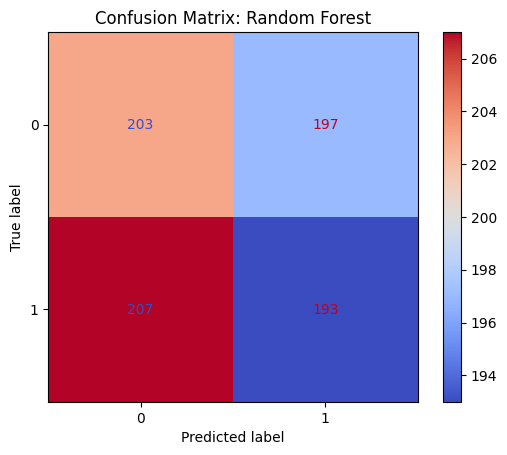

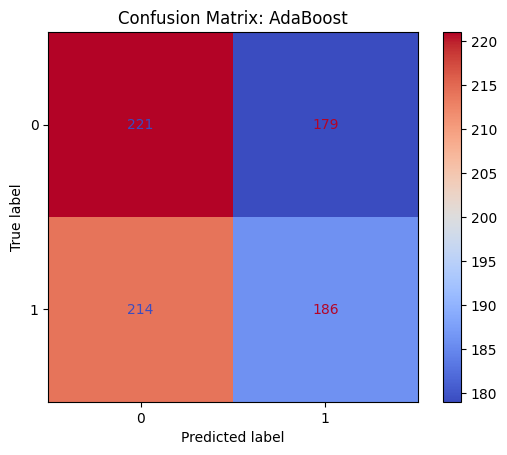

In [11]:
# Define models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
ab_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

rf_clf.fit(X_train, y_train)
ab_clf.fit(X_train, y_train)

# Generate predictions
y_pred_rf = rf_clf.predict(X_test)
y_pred_ab = ab_clf.predict(X_test)

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)
disp_rf.plot(cmap='coolwarm')

# AdaBoost Confusion Matrix
cm_ab = confusion_matrix(y_test, y_pred_ab)
disp_ab = ConfusionMatrixDisplay(confusion_matrix=cm_ab, display_labels=ab_clf.classes_)
disp_ab.plot(cmap='coolwarm')


In [12]:
from scipy.stats import ttest_rel

# Initialize models
tree_clf = DecisionTreeClassifier(random_state=35)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
ab_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Arrays to store accuracy scores for each fold
tree_accuracies = []
rf_accuracies = []
ab_accuracies = []

# Perform Stratified K-Fold Cross-Validation
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train and evaluate Decision Tree
    tree_clf.fit(X_train, y_train)
    tree_preds = tree_clf.predict(X_test)
    tree_accuracies.append(accuracy_score(y_test, tree_preds))

    # Train and evaluate Random Forest
    rf_clf.fit(X_train, y_train)
    rf_preds = rf_clf.predict(X_test)
    rf_accuracies.append(accuracy_score(y_test, rf_preds))

    # Train and evaluate AdaBoost
    ab_clf.fit(X_train, y_train)
    ab_preds = ab_clf.predict(X_test)
    ab_accuracies.append(accuracy_score(y_test, ab_preds))

# Convert lists to arrays
tree_accuracies = np.array(tree_accuracies)
rf_accuracies = np.array(rf_accuracies)
ab_accuracies = np.array(ab_accuracies)

# Perform paired t-tests
print("Decision Tree vs. Random Forest:", ttest_rel(tree_accuracies, rf_accuracies))
print("Decision Tree vs. AdaBoost:", ttest_rel(tree_accuracies, ab_accuracies))
print("Random Forest vs. AdaBoost:", ttest_rel(rf_accuracies, ab_accuracies))


Paired T-Test Results:
Decision Tree vs. Random Forest: TtestResult(statistic=1.2421727018672508, pvalue=0.24556522788642124, df=9)
Decision Tree vs. AdaBoost: TtestResult(statistic=0.6555213366563072, pvalue=0.528530707148277, df=9)
Random Forest vs. AdaBoost: TtestResult(statistic=-0.6121334672947043, pvalue=0.555596669799, df=9)


Trade-off between bias and variance

1. Decision Tree Classifier
  - Decision trees tend to memorize training data making them highly sensitive to small changes in the dataset thus it has high variance. On the other hand, trees can perfectly fit the training data, meaning they make few simplifying assumptions and thus have low bias.
  - A deep tree captures noise and leads to poor generalization leading to a overfitting risk while shallow trees oversimplify, leading to high training and test errors leading to an underfitting risk
  - In order to balance bias-variance we could reduce tree depth thus reducing variance and increasing bias.

2. Random Forest
    - The Random Forest algorithm has a lower variance than decision trees. This is because averaging mulitple trees reduces sensitivity to data variations. It also has a slightly higher bias since each tree is trained on random subsets of features and data.
    - Random Forest also prevents overfitting by aggregating results from multiple learners. Even with noisy data the predictions are stable and consistent.
    - In order to balance bias-variance we can add more estimators (trees) thus it will decrease variance but increase training time. However this algorithm balances bias-variance better than the other two.

3. AdaBoost
  - Adaboost has a lower bias and focuses on errors from previous iterations, refining predictions. It also gives more weight to hard-to-classify points, making it sensitive to noise and havea higher variance.
  - It preforms well on clean data and adapts to patterns well. However boosting magnifies errors caused by missclassified points thus overfitting noisy data.
  - In order to balance bias variance we can use regularization (for example setting a learning rate) to control sensitivity and noise.

  These links: [link](https://www.geeksforgeeks.org/differences-between-random-forest-and-adaboost/), [link](https://medium.com/@brandon93.w/decision-tree-random-forest-and-xgboost-an-exploration-into-the-heart-of-machine-learning-90dc212f4948), [link](https://www.geeksforgeeks.org/difference-between-random-forest-and-decision-tree/) were used to help research these algorithms.

